In [1]:
import torch
import mamba_ssm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange

/gpfs/users/goon/.pyenv/versions/3.9.20/envs/mamba/lib/python3.9/site-packages/mamba_ssm/ops/selective_scan_interface.py:164: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, xz, conv1d_weight, conv1d_bias, x_proj_weight, delta_proj_weight,
/gpfs/users/goon/.pyenv/versions/3.9.20/envs/mamba/lib/python3.9/site-packages/mamba_ssm/ops/selective_scan_interface.py:240: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dout):
/gpfs/users/goon/.pyenv/versions/3.9.20/envs/mamba/lib/python3.9/site-packages/mamba_ssm/ops/triton/layer_norm.py:986: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(
/gpfs/users/goon/.pyenv/versions/3.9.20/envs/mamba/lib/python3.9/site-packages/mamba_

In [2]:
in_features_min=512
in_features_max=8096
seq_len=4096
bsz=8
device="cuda"

In [3]:
from mamba_ssm.modules.mlp import GatedMLP

mlp_amp = False
mlp_results = []
for in_features in trange(in_features_min, in_features_max+1, 128):
    mlp = GatedMLP(in_features, device=device)
    inputs = torch.randn(bsz, seq_len, in_features, device=device)
    with torch.no_grad():
        with torch.autocast(device_type="cuda", dtype=torch.bfloat16, enabled=mlp_amp):
            outputs = mlp(inputs)
    mlp_results_dict = {"in_features": in_features,
                    "l2_mean": outputs.pow(2).mean().item(),
                    "l1_mean": outputs.abs().mean().item(),
                    "l2_sum": outputs.pow(2).sum().item(),
                    "l1_sum": outputs.abs().sum().item(),
                    "std": outputs.std().item(),
                    "var": outputs.var().item(),
                    "mean": outputs.mean().item(),
                   }
    mlp_results.append(mlp_results_dict)
    
mlp_df = pd.DataFrame(mlp_results)
mlp_df

  0%|          | 0/60 [00:00<?, ?it/s]

,in_features,l2_mean,l1_mean,l2_sum,l1_sum,std,var,mean
0,512,0.011121,0.083877,1.865778e+05,1407225.75,0.105456,0.011121,-8.718239e-05
1,640,0.011142,0.084012,2.336656e+05,1761864.50,0.105556,0.011142,7.430762e-05
2,768,0.011132,0.084014,2.801534e+05,2114283.50,0.105510,0.011132,4.184155e-06
3,896,0.011095,0.083895,3.257572e+05,2463164.50,0.105334,0.011095,9.964794e-05
4,1024,0.011118,0.083994,3.730539e+05,2818387.50,0.105441,0.011118,-5.494467e-05
5,1152,0.011096,0.083928,4.188533e+05,3168175.75,0.105337,0.011096,1.296482e-04
6,1280,0.011110,0.083993,4.659668e+05,3522937.00,0.105402,0.011110,5.791075e-05
7,1408,0.011099,0.083965,5.120950e+05,3873909.25,0.105353,0.011099,-5.074015e-06
8,1536,0.011112,0.084019,5.592694e+05,4228831.50,0.105412,0.011112,3.049317e-05
9,1664,0.011094,0.083960,6.049195e+05,4577996.50,0.105329,0.011094,-3.864108e-05


Text(0.5, 0.98, 'MLP scaling')

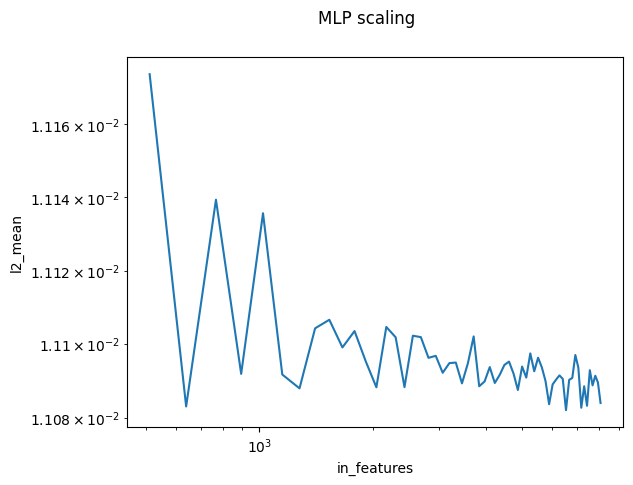

In [49]:
mlp_plot = sns.lineplot(data=mlp_df, x="in_features", y="l2_mean")
mlp_plot.set(xscale="log")
mlp_plot.set(yscale="log")
plt.suptitle("MLP scaling")

In [51]:
from mamba_ssm.modules.mha import MHA

attn_results = []
attn_amp = False
for in_features in trange(in_features_min, in_features_max+1, head_dim):
    attn_cfg = {
    "causal": True,
    "head_dim": head_dim,
    "num_heads": in_features // head_dim,
    "out_proj_bias": False,
    "qkv_proj_bias": False,
    "rotary_emb_dim": head_dim // 2,  # Apparently correct for mamba-ssm
}

    mha = MHA(in_features, **attn_cfg, device=device)
    inputs = torch.randn(bsz, seq_len, in_features, device=device)
    with torch.no_grad():
        with torch.autocast(device_type="cuda", dtype=torch.bfloat16, enabled=attn_amp):
            outputs = mha(inputs)
    attn_results_dict = {"in_features": in_features,
                    "l2_mean": outputs.pow(2).mean().item(),
                    "l1_mean": outputs.abs().mean().item(),
                    "l2_sum": outputs.pow(2).sum().item(),
                    "l1_sum": outputs.abs().sum().item(),
                    "std": outputs.std().item(),
                    "var": outputs.var().item(),
                    "mean": outputs.mean().item(),
                   }
    attn_results.append(attn_results_dict)

attn_df = pd.DataFrame(attn_results)
attn_df


  0%|          | 0/60 [00:00<?, ?it/s]

,in_features,l2_mean,l1_mean,l2_sum,l1_sum,std,var,mean
0,512,0.000275,0.009330,4613.467773,1.565370e+05,0.016582,0.000275,-1.010354e-04
1,640,0.000266,0.009001,5588.289551,1.887685e+05,0.016324,0.000266,-8.209168e-05
2,768,0.000276,0.009147,6955.855469,2.302032e+05,0.016625,0.000276,-5.727553e-05
3,896,0.000272,0.009112,7979.854980,2.675373e+05,0.016486,0.000272,-1.254767e-04
4,1024,0.000269,0.008986,9034.501953,3.015134e+05,0.016408,0.000269,1.708537e-04
5,1152,0.000269,0.008914,10144.068359,3.364887e+05,0.016393,0.000269,3.616101e-05
6,1280,0.000270,0.008996,11309.332031,3.773159e+05,0.016420,0.000270,-1.442725e-04
7,1408,0.000272,0.008931,12566.797852,4.120445e+05,0.016504,0.000272,-2.694062e-05
8,1536,0.000270,0.008957,13579.296875,4.508371e+05,0.016425,0.000270,1.405432e-05
9,1664,0.000271,0.008932,14752.264648,4.870127e+05,0.016448,0.000271,-8.435890e-05


Text(0.5, 0.98, 'MHA scaling')

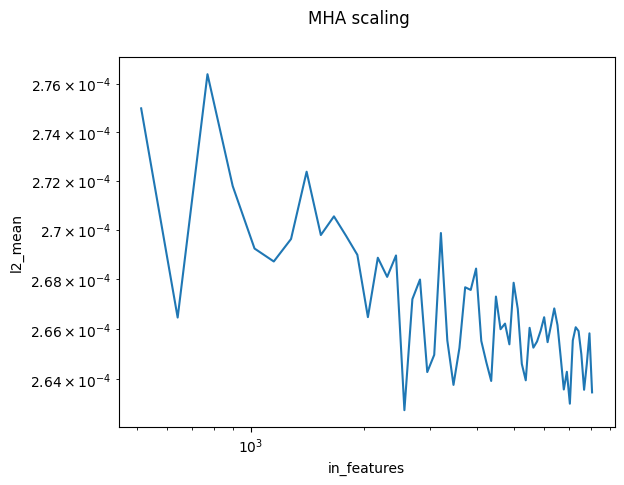

In [52]:
attn_plot = sns.lineplot(data=attn_df, x="in_features", y="l2_mean")
attn_plot.set(xscale="log")
attn_plot.set(yscale="log")

plt.suptitle("MHA scaling")

In [7]:
from mamba_ssm.models.config_mamba import MambaConfig
from mamba_ssm.models.mixer_seq_simple import MambaLMHeadModel
from fms_fsdp.mup


model_results = []
model_amp = True
mup = True
n_layer=4
vocab_size=128256
head_dim=128
for in_features in trange(in_features_min, in_features_max+1, 4*head_dim):
    attn_cfg = {
    "causal": True,
    "head_dim": head_dim,
    "num_heads": in_features // head_dim,
    "out_proj_bias": False,
    "qkv_proj_bias": False,
    "rotary_emb_dim": head_dim // 2,  # Apparently correct for mamba-ssm
}
    if mup:
        attn_cfg["softmax_scale"] = head_dim
    
    config = MambaConfig(
    d_model=in_features,
    d_intermediate=4 * in_features,
    n_layer=n_layer,
    attn_layer_idx=list(range(n_layer)),  # Transformer-only blocks
    vocab_size=vocab_size,
    attn_cfg=attn_cfg,
    tie_embeddings=False,
)
    model = MambaLMHeadModel(config=config, device=device)
    inputs = torch.randint(vocab_size, size=(bsz, seq_len), device=device)
    with torch.no_grad():
        with torch.autocast(device_type="cuda", dtype=torch.bfloat16, enabled=model_amp):
            outputs = model(inputs).logits
    model_results_dict = {"in_features": in_features,
                    "l2_mean": outputs.pow(2).mean().item(),
                    "l1_mean": outputs.abs().mean().item(),
                    "l2_sum": outputs.pow(2).sum().item(),
                    "l1_sum": outputs.abs().sum().item(),
                    "std": outputs.std().item(),
                    "var": outputs.var().item(),
                    "mean": outputs.mean().item(),
                   }
    model_results.append(model_results_dict)

model_df = pd.DataFrame(model_results)
model_df

SyntaxError: invalid syntax (715322914.py, line 3)

Text(0.5, 0.98, 'Model scaling')

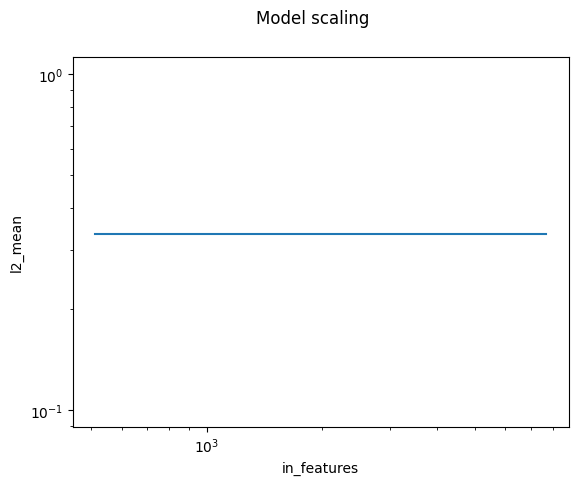

In [6]:
model_plot = sns.lineplot(data=model_df, x="in_features", y="l2_mean")
model_plot.set(xscale="log")
model_plot.set(yscale="log")

plt.suptitle("Model scaling")
